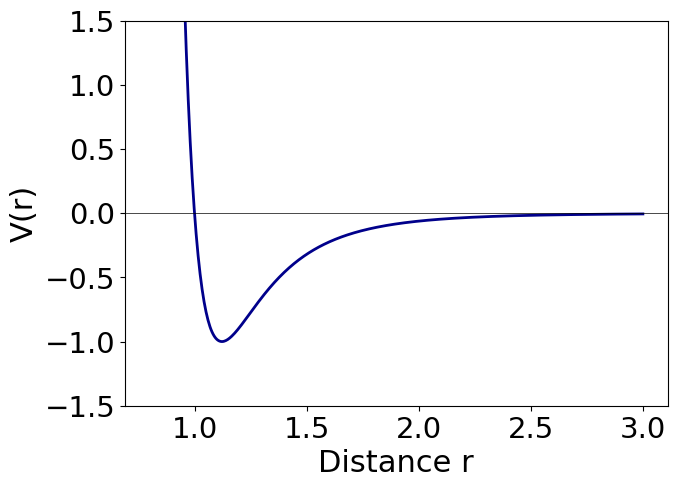

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del potencial de Lennard-Jones
epsilon = 1.0   # profundidad del pozo
sigma = 1.0     # distancia a la cual el potencial es cero

def lennard_jones(r, epsilon=epsilon, sigma=sigma):
    """
    Calcula el potencial de Lennard-Jones para un arreglo de distancias r.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Rango de distancias (evitar r=0)
r = np.linspace(0.8, 3.0, 500)
V = lennard_jones(r)

# Gráfica
plt.figure(figsize=(7,5))
plt.plot(r, V,linewidth=2,color = 'darkblue')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel("Distance r",fontsize=22)
plt.ylabel("V(r)",fontsize=22)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21) 
plt.ylim(-1.5,1.5)
plt.grid(False)
plt.show()


Equilibrium temperature: T_eq = 85.53


C:\Users\PC\AppData\Local\Temp\ipykernel_14824\1204594209.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0,3].legend(fontsize=20, title="MB Distribution", title_fontsize=20,


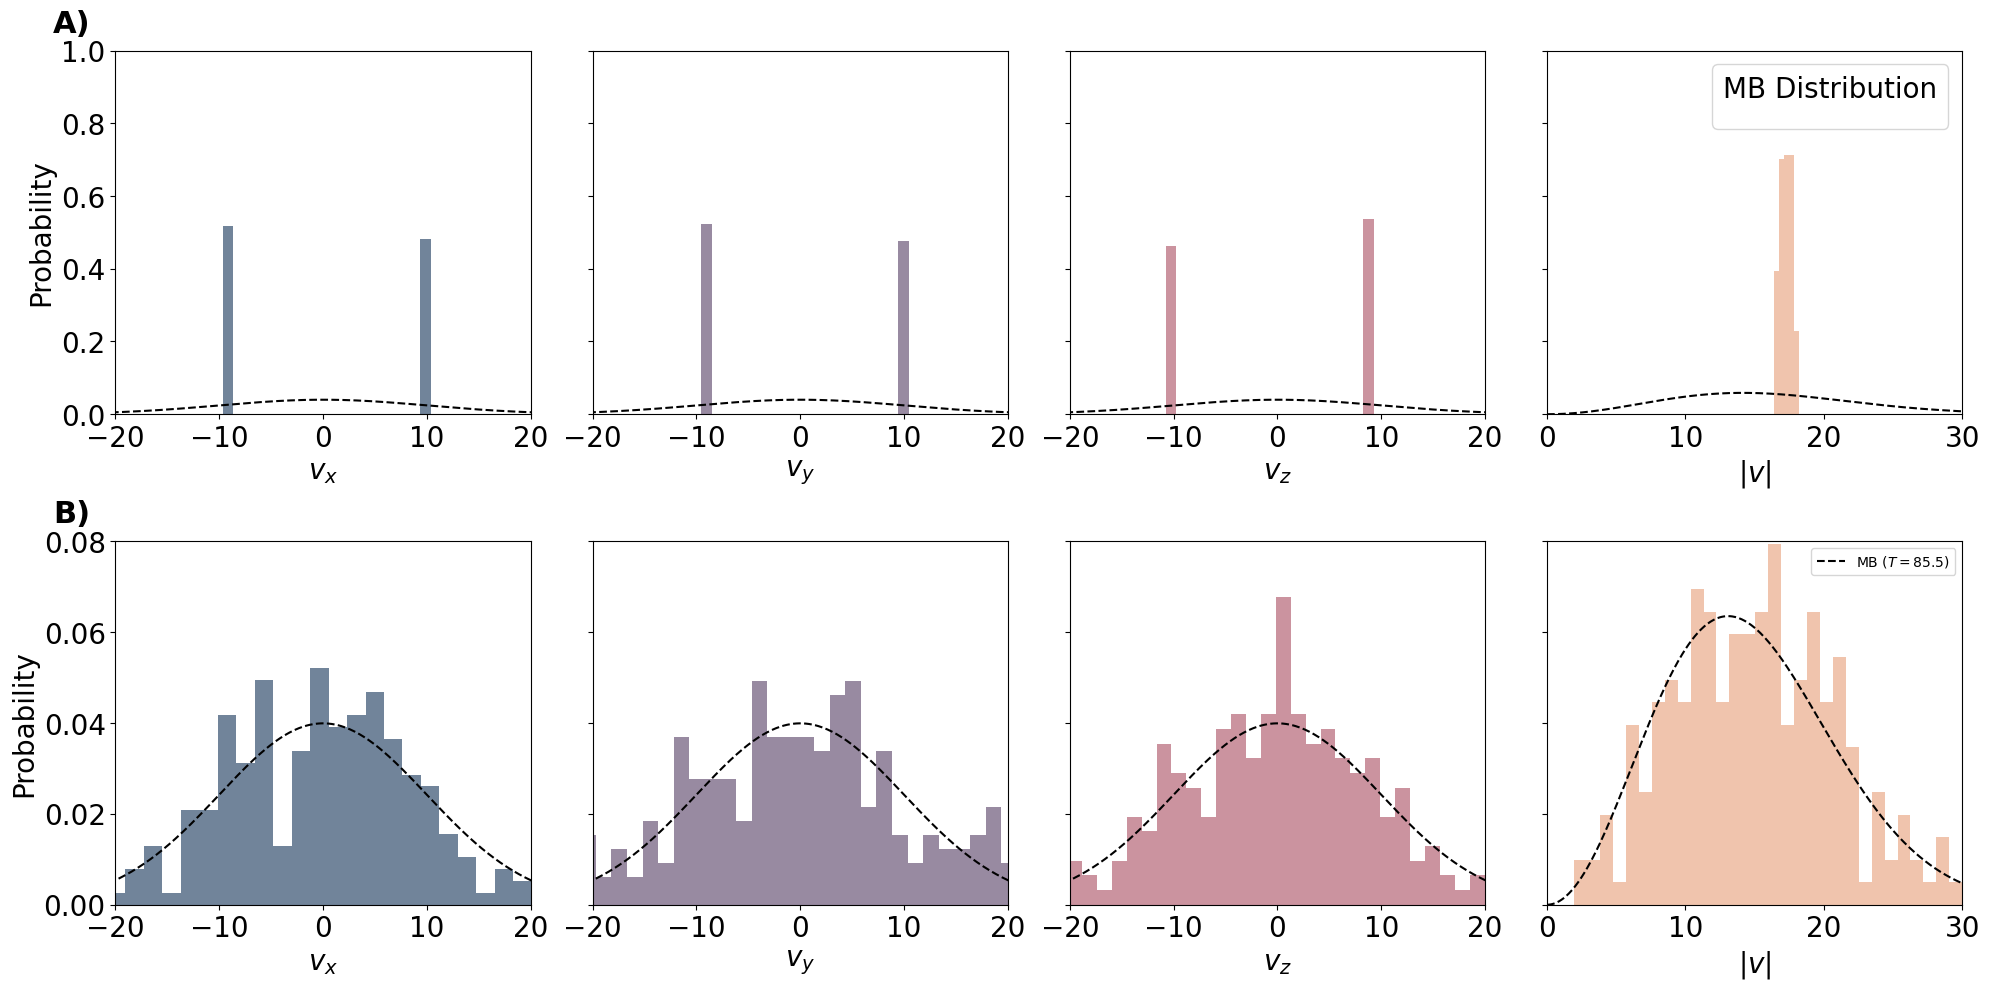

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Paleta ----------
colors = {
    "DuskBlue": "#355070",
    "DustyLavender": "#6d597a",
    "Rosewood": "#b56576",
    "LightCoral": "#e56b6f",
    "LightBronze": "#eaac8b"
}

# ---------- Parámetros ----------
T = 100.0
x_min, x_max = -20, 20
ymax_initial = 1.0
ymax_final = 0.08  # Para la segunda fila

# ---------- Cargar datos ----------
data_i = np.loadtxt("initial_velocities.dat", comments="#")
data_f = np.loadtxt("final_velocities_VERLET_dt_0.0010.dat", comments="#")

vxi, vyi, vzi = data_i[:,0], data_i[:,1], data_i[:,2]
vxf, vyf, vzf = data_f[:,0], data_f[:,1], data_f[:,2]

N = len(vxf)
T_eq = (vxf**2 + vyf**2 + vzf**2).sum() / (3 * N)
print(f"Equilibrium temperature: T_eq = {T_eq:.2f}")

vmod_i = np.sqrt(vxi**2 + vyi**2 + vzi**2)
vmod_f = np.sqrt(vxf**2 + vyf**2 + vzf**2)

# ---------- Teoría ----------
v = np.linspace(-30, 30, 400)
vpos = np.linspace(0, 30, 400)

def MB_component(v, T):
    return (1/np.sqrt(2*np.pi*T)) * np.exp(-v**2/(2*T))

def MB_speed(v, T):
    return 4*np.pi * v**2 * (1/(2*np.pi*T))**(3/2) * np.exp(-v**2/(2*T))

# ---------- Figura ----------
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey='row')

# ===== FILA 1: INICIAL =====
axes[0,0].hist(vxi, bins=20, density=True, color=colors["DuskBlue"], alpha=0.7)
axes[0,0].plot(v, MB_component(v, T), 'k--', label="MB Distribution")
axes[0,0].set_xlabel("$v_x$", fontsize=20)
axes[0,0].set_ylabel("Probability", fontsize=20)

axes[0,1].hist(vyi, bins=20, density=True, color=colors["DustyLavender"], alpha=0.7)
axes[0,1].plot(v, MB_component(v, T), 'k--')
axes[0,1].set_xlabel("$v_y$", fontsize=20)

axes[0,2].hist(vzi, bins=20, density=True, color=colors["Rosewood"], alpha=0.7)
axes[0,2].plot(v, MB_component(v, T), 'k--')
axes[0,2].set_xlabel("$v_z$", fontsize=20)

axes[0,3].hist(vmod_i, bins=5, density=True, color=colors["LightBronze"], alpha=0.7)
axes[0,3].plot(vpos, MB_speed(vpos, T), 'k--')
axes[0,3].set_xlabel("$|v|$", fontsize=20)

# Título subfigura A
axes[0,0].text(-0.15, 1.05, "A)", transform=axes[0,0].transAxes,
               fontsize=22, fontweight='bold')

# ===== FILA 2: FINAL =====
axes[1,0].hist(vxf, bins=30, density=True, color=colors["DuskBlue"], alpha=0.7)
axes[1,0].plot(v, MB_component(v, T), 'k--')
axes[1,0].set_xlabel("$v_x$", fontsize=20)
axes[1,0].set_ylabel("Probability", fontsize=20)

axes[1,1].hist(vyf, bins=30, density=True, color=colors["DustyLavender"], alpha=0.7)
axes[1,1].plot(v, MB_component(v, T), 'k--')
axes[1,1].set_xlabel("$v_y$", fontsize=20)

axes[1,2].hist(vzf, bins=30, density=True, color=colors["Rosewood"], alpha=0.7)
axes[1,2].plot(v, MB_component(v, T), 'k--')
axes[1,2].set_xlabel("$v_z$", fontsize=20)

axes[1,3].hist(vmod_f, bins=30, density=True, color=colors["LightBronze"], alpha=0.7)
#axes[1,3].plot(vpos, MB_speed(vpos, T), 'k--')
axes[1,3].plot(vpos, MB_speed(vpos, T_eq), 'k--', label=fr"MB ($T={T_eq:.1f}$)")
axes[1,3].set_xlabel("$|v|$", fontsize=20)
axes[1,3].legend()

# Título subfigura B
axes[1,0].text(-0.15, 1.05, "B)", transform=axes[1,0].transAxes,
               fontsize=22, fontweight='bold')

# ---------- Ajustes generales ----------
for i, ax in enumerate(axes.flat):
    # Límites x
    if ax in [axes[0,3], axes[1,3]]:
        ax.set_xlim(0, 30)
    else:
        ax.set_xlim(x_min, x_max)
    
    # Límites y
    if i // 4 == 0:  # Fila 1
        ax.set_ylim(0, ymax_initial)
    else:           # Fila 2
        ax.set_ylim(0, ymax_final)
    
    ax.tick_params(labelsize=20)

# ---------- Leyenda para la teoría a la derecha ----------
axes[0,3].legend(fontsize=20, title="MB Distribution", title_fontsize=20,
                 loc='upper right')

plt.tight_layout()
plt.savefig("figures/velocities_distributions.svg")
plt.show()



82.15 T final

Verlet at T fija

COMPARISON FOR DIFFERENT DT AN ALGORITHMS

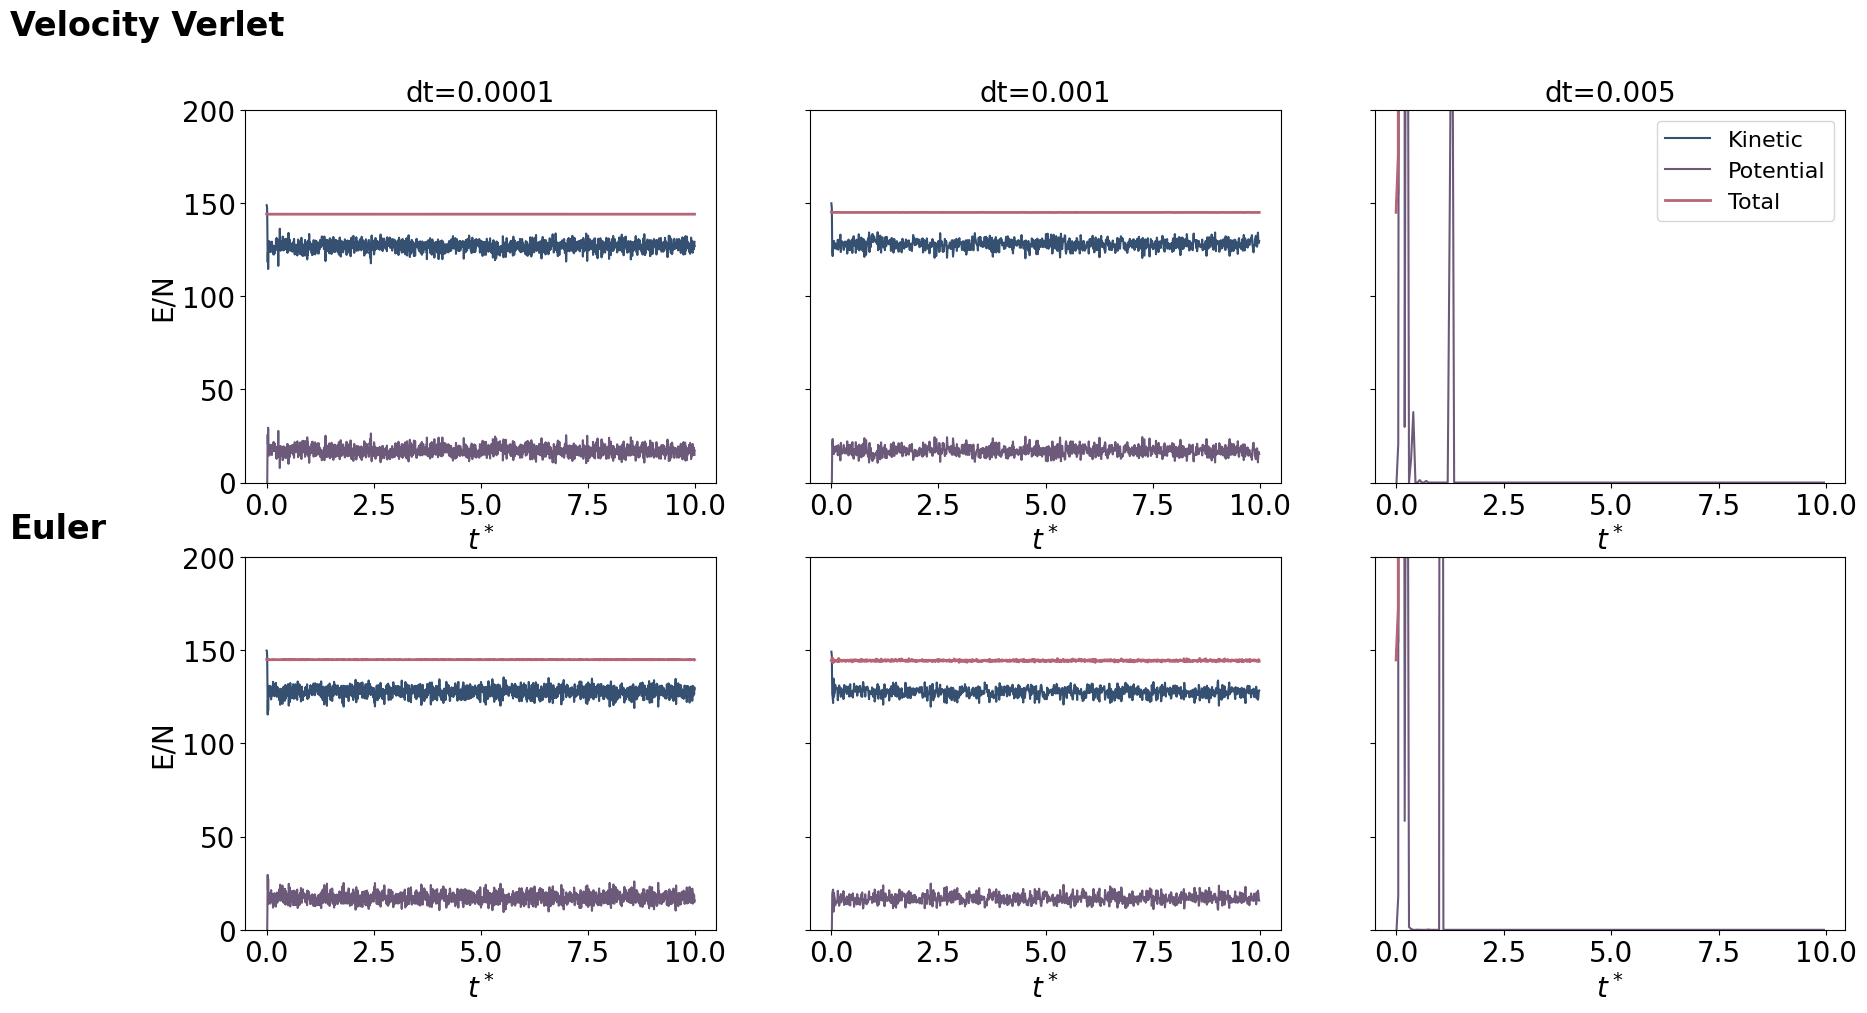

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# Colores de paleta
colors = {
    "KE": "#355070",  # Dusk Blue
    "PE": "#6d597a",  # Dusty Lavender
    "TE": "#b56576"   # Rosewood
}

dts = [0.0001, 0.001, 0.005]
N = 216

fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)

# Límites eje y fijos
ymin, ymax = 0, 200

# Fila 1: Velocity Verlet
for i, dt in enumerate(dts):
    files = sorted(glob.glob(f"thermodynamics_VERLET_dt_{dt:.4f}.dat"))
    if not files:
        continue
    data = np.loadtxt(files[0], comments="#")
    time = data[:,1]
    KE, PE, TE = data[:,2]/N, data[:,3]/N, data[:,4]/N
    
    ax = axes[0,i]
    ax.plot(time, KE, color=colors["KE"], label="Kinetic")
    ax.plot(time, PE, color=colors["PE"], label="Potential")
    ax.plot(time, TE, color=colors["TE"], label="Total", linewidth=2)
    
    ax.set_ylim(ymin, ymax)
    ax.set_title(f"dt={dt}", fontsize=20)
    if i == 0: ax.set_ylabel("E/N", fontsize=20)
    ax.set_xlabel(r"$t^*$", fontsize=20)
    ax.tick_params(axis='both', labelsize=20)
      # Leyenda solo en el último gráfico de la fila
    if i == len(dts)-1:
        ax.legend(fontsize=16, loc='upper right')

# Fila 2: Euler
for i, dt in enumerate(dts):
    files = sorted(glob.glob(f"thermodynamics_EULER_dt_{dt:.4f}.dat"))
    if not files:
        continue
    data = np.loadtxt(files[0], comments="#")
    time = data[:,1]
    KE, PE, TE = data[:,2]/N, data[:,3]/N, data[:,4]/N
    
    ax = axes[1,i]
    ax.plot(time, KE, color=colors["KE"])
    ax.plot(time, PE, color=colors["PE"])
    ax.plot(time, TE, color=colors["TE"], linewidth=2)
    
    ax.set_ylim(ymin, ymax)
    if i == 0: ax.set_ylabel("E/N", fontsize=20)
    ax.set_xlabel(r"$t^*$", fontsize=20)
    ax.tick_params(axis='both', labelsize=20)

# Títulos de fila
axes[0,0].text(-0.5, 1.2, "Velocity Verlet", transform=axes[0,0].transAxes, fontsize=24, weight='bold')
axes[1,0].text(-0.5, 1.05, "Euler", transform=axes[1,0].transAxes, fontsize=24, weight='bold')

plt.subplots_adjust(left=0.1, right=0.9, top=0.92, bottom=0.1)
plt.savefig("figures/energies_EULER_VERLET_dts.svg")
plt.show()


## 2. Energies for different densities

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Constantes físicas -----
epsilon = 0.998  # kJ/mol
sigma = 3.4e-10  # metros
m_atom = 40.0/1000/6.022e23  # kg/átomo, 40 g/mol -> kg/átomo
kb = 1.380649e-23  # J/K

# Conversiones
# Energía LJ -> kJ/mol: multiplicar por epsilon
# Densidad LJ -> kg/m^3: rho_LJ * m_atom / sigma^3


In [11]:
# Densidades simuladas
rhos_LJ = [0.1, 0.2, 0.4, 0.6, 0.8]

# Aquí se guardarán las energías promedio
KE_avg = []
PE_avg = []
TE_avg = []

for rho in rhos_LJ:
    filename = f'thermo_rho_{rho:.2f}_pressure_dt_0.0010.dat'  # ajusta al nombre real
    data = np.loadtxt(filename, comments='#')
    
    KE_LJ = data[:,2]  # energía cinética total
    PE_LJ = data[:,3]  # energía potencial total
    TE_LJ = data[:,4]  # energía total
    
    N = 216  # número de partículas
    
    # Energía por partícula
    KE_per_particle = KE_LJ / N
    PE_per_particle = PE_LJ / N
    TE_per_particle = TE_LJ / N
    
    # Promedio sobre todo el tiempo (o bloque de medidas)
    KE_avg.append(np.mean(KE_per_particle)*epsilon)  # kJ/mol
    PE_avg.append(np.mean(PE_per_particle)*epsilon)
    TE_avg.append(np.mean(TE_per_particle)*epsilon)


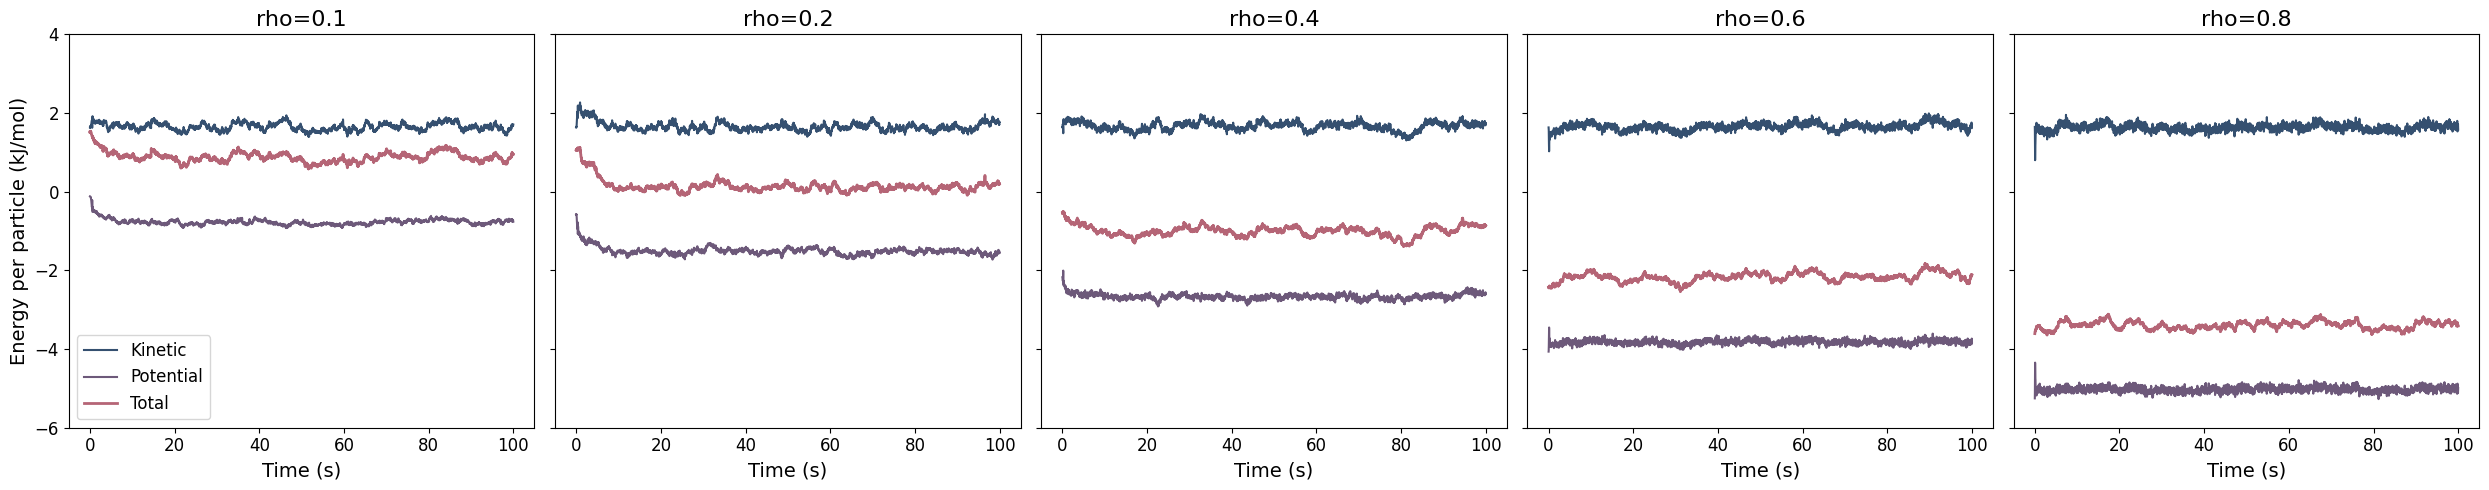

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Densidades simuladas
rhos_LJ = [0.1, 0.2, 0.4, 0.6, 0.8]
N = 216  # número de partículas
# Colores de paleta
colors = {
    "KE": "#355070",  # Dusk Blue
    "PE": "#6d597a",  # Dusty Lavender
    "TE": "#b56576"   # Rosewood
}

fig, axes = plt.subplots(1, len(rhos_LJ), figsize=(25,5), sharey=True)

ymin, ymax = -6, 4 # ajustar según tus datos

for i, rho in enumerate(rhos_LJ):
    filename = f'thermo_rho_{rho:.2f}_pressure_dt_0.0010.dat'  # ajustar nombre exacto
    data = np.loadtxt(filename, comments='#')
    
    time = data[:,1]  # tiempo
    KE = data[:,2] * epsilon
    PE = data[:,3] * epsilon
    TE = data[:,4] * epsilon
    P = data[:,5]
    
    ax = axes[i]
    ax.plot(time, KE, color=colors["KE"], label="Kinetic")
    ax.plot(time, PE, color=colors["PE"], label="Potential")
    ax.plot(time, TE, color=colors["TE"], label="Total", linewidth=2)
    
    ax.set_title(f"rho={rho}", fontsize=16)
    ax.set_xlabel("Time (s)", fontsize=14)
    if i == 0:
        ax.set_ylabel("Energy per particle (kJ/mol)", fontsize=14)
    ax.set_ylim(ymin, ymax)
    ax.tick_params(axis='both', labelsize=12)
    
    # Leyenda solo en el primer gráfico
    if i == 0:
        ax.legend(fontsize=12)

plt.tight_layout()
plt.show()


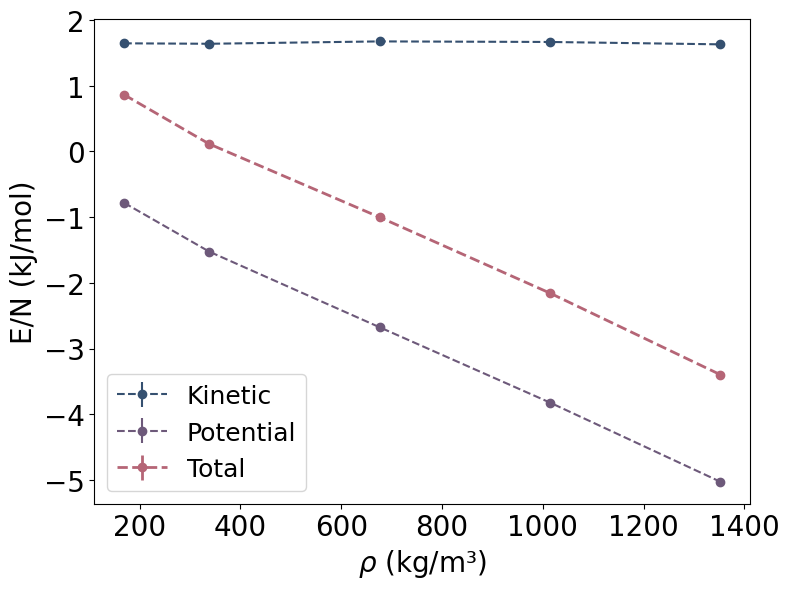

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas de argón
epsilon = 0.998  # kJ/mol
sigma = 3.4e-10  # m
mass_Ar = 40e-3  # kg/mol

# Densidades simuladas (en unidades reducidas)
rhos_LJ = [0.1, 0.2, 0.4, 0.6, 0.8]
N = 216  # número de partículas

# Colores
colors = {"KE": "#355070", "PE": "#6d597a", "TE": "#b56576"}

# Convertir densidad a kg/m3
rho_physical = np.array(rhos_LJ) * mass_Ar / sigma**3 / 6.022e23  # kg/m^3

# Arreglos para promedios y errores
KE_avg, PE_avg, TE_avg = [], [], []
KE_std, PE_std, TE_std = [], [], []

for rho in rhos_LJ:
    filename = f'thermo_rho_{rho:.2f}_pressure_dt_0.0010.dat'
    data = np.loadtxt(filename, comments='#')
    
    n_eq = int(0.2 * len(data))  # descartar 20% inicial
    data_eq = data[n_eq:]        # datos equilibrados
    
    KE = data_eq[:,2] * epsilon
    PE = data_eq[:,3] * epsilon
    TE = data_eq[:,4] * epsilon
    
    KE_avg.append(np.mean(KE))
    PE_avg.append(np.mean(PE))
    TE_avg.append(np.mean(TE))
    
    KE_std.append(np.std(KE)/np.sqrt(len(KE)))  # error de la media
    PE_std.append(np.std(PE)/np.sqrt(len(PE)))
    TE_std.append(np.std(TE)/np.sqrt(len(TE)))

# Graficar
plt.figure(figsize=(8,6))
plt.errorbar(rho_physical, KE_avg, yerr=KE_std, fmt='--o', color=colors["KE"], label="Kinetic")
plt.errorbar(rho_physical, PE_avg, yerr=PE_std, fmt='--o', color=colors["PE"], label="Potential")
plt.errorbar(rho_physical, TE_avg, yerr=TE_std, fmt='--o', color=colors["TE"], label="Total", linewidth=2)

plt.xlabel(r"$\rho$ (kg/m³)", fontsize=20)
plt.ylabel("E/N (kJ/mol)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=18)
plt.grid(False)
plt.tight_layout()
plt.savefig("figures/energies_vs_density.svg")
plt.show()


LJ - $kg/m^3$

In [ ]:
rhos_kg_m3 = [rho * m_atom / sigma**3 for rho in rhos_LJ]

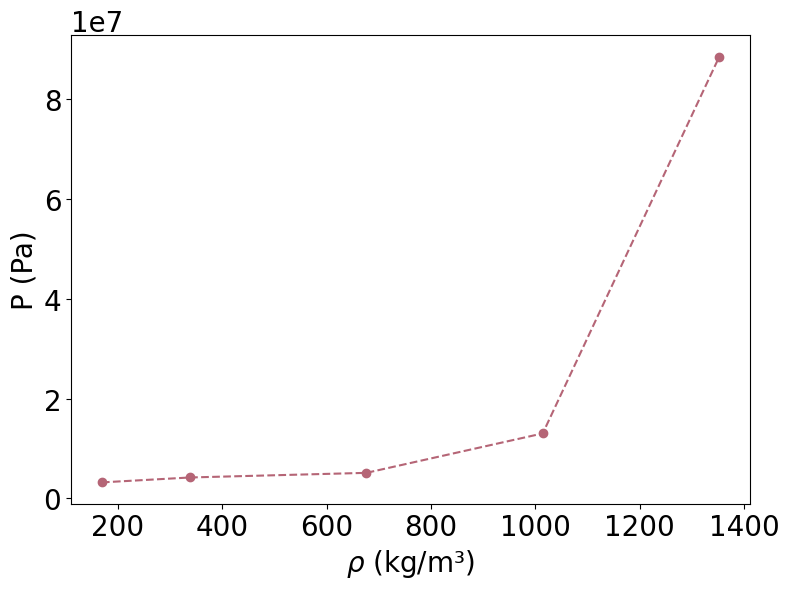

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas de argón
epsilon = 0.998  # kJ/mol
sigma = 3.4e-10  # m
mass_Ar = 40e-3  # kg/mol
NA = 6.022e23    # Avogadro

# Densidades reducidas
rhos_LJ = [0.1, 0.2, 0.4, 0.6, 0.8]

# Convertir densidad a kg/m^3
rho_physical = np.array(rhos_LJ) * mass_Ar / (NA * sigma**3)

# Listas para promedios y errores
P_avg, P_err = [], []

for rho in rhos_LJ:
    filename = f'thermo_rho_{rho:.2f}_pressure_dt_0.0010.dat'
    data = np.loadtxt(filename, comments='#')

    # Descartar 20% inicial (equilibración)
    n_eq = int(0.2 * len(data))
    data_eq = data[n_eq:]

    P_reduced = data_eq[:,5]  # presión en unidades reducidas (epsilon/sigma^3)

    # Convertir a Pascal: 1 epsilon / sigma^3 ≈ 0.998e3 J/mol / (3.4e-10)^3 * 1/NA
    factor = epsilon*1000 / (sigma**3 * NA)  # Pa
    P_SI = P_reduced * factor

    P_avg.append(np.mean(P_SI))
    P_err.append(np.std(P_SI)/np.sqrt(len(P_SI)))

# Graficar presión vs densidad
plt.figure(figsize=(8,6))
plt.errorbar(rho_physical, P_avg, yerr=P_err, fmt='--o', color='#b56576', label='Pressure')
plt.xlabel(r"$\rho$ (kg/m³)", fontsize=20)
plt.ylabel("P (Pa)", fontsize=20)
plt.xticks(fontsize=20)
# Después de crear tu gráfica
plt.gca().yaxis.get_offset_text().set_fontsize(20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("figures/pressure_vs_density.svg")
plt.show()


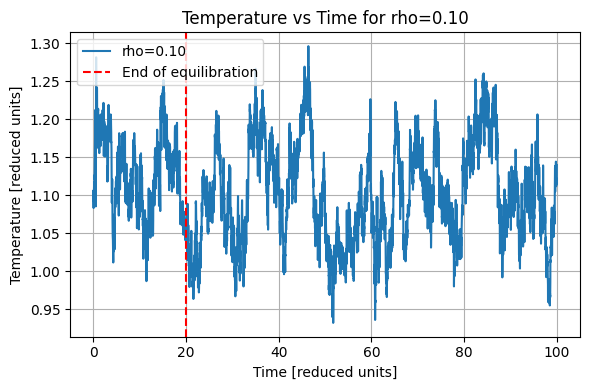

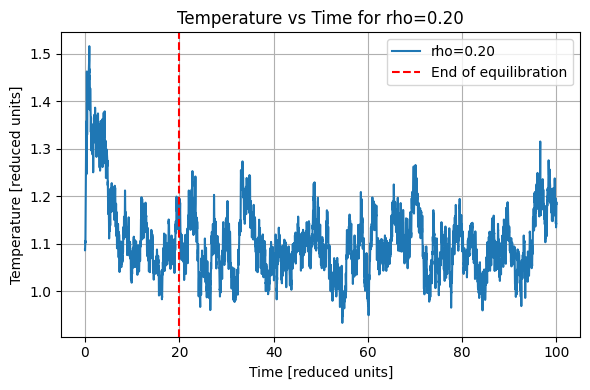

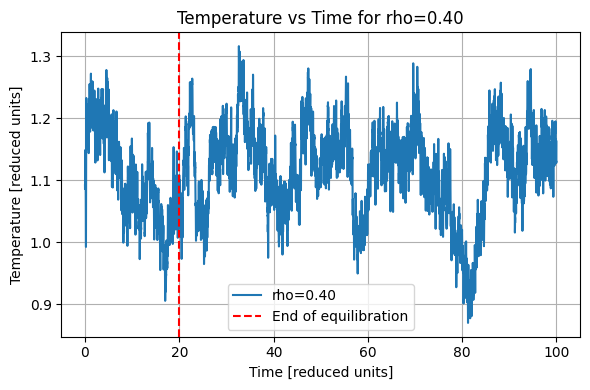

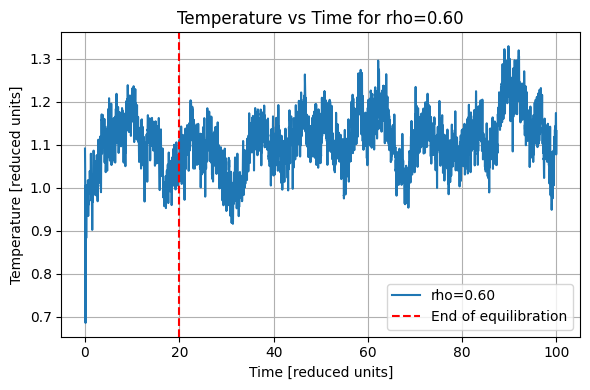

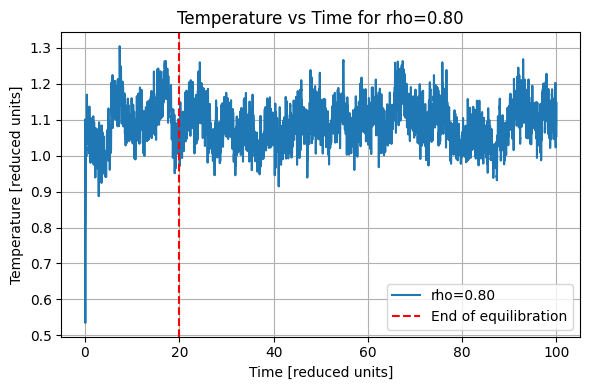

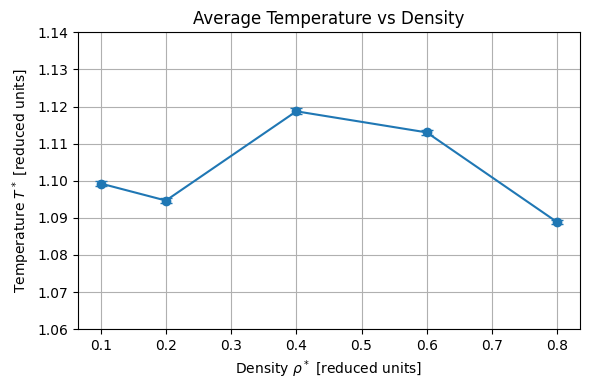

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Densidades a analizar
# -----------------------------
rhos_reduced = [0.1, 0.2, 0.4, 0.6, 0.8]
discard_frac = 0.2  # descartar el 20% inicial (equilibración)

# -----------------------------
# Arrays para resultados
# -----------------------------
T_mean = []
T_err  = []

# -----------------------------
# Bucle sobre densidades
# -----------------------------
for rho in rhos_reduced:
    filename = f"thermo_rho_{rho:.2f}_pressure_dt_0.0010.dat"
    data = np.loadtxt(filename, comments='#')

    time = data[:,1]           # tiempo
    KE_per_N = data[:,2]       # energía cinética por partícula
    T_inst = 2.0*KE_per_N/3.0  # temperatura instantánea (unidades reducidas)

    # Quitar fase de equilibración
    n_cut = int(discard_frac * len(T_inst))
    T_eq = T_inst[n_cut:]

    # Promedio y error estadístico
    T_mean.append(np.mean(T_eq))
    T_err.append(np.std(T_eq)/np.sqrt(len(T_eq)))

    # Plot de T vs tiempo para cada rho
    plt.figure(figsize=(6,4))
    plt.plot(time, T_inst, '-', label=f'rho={rho:.2f}')
    plt.axvline(time[n_cut], color='r', linestyle='--', label='End of equilibration')
    plt.xlabel("Time [reduced units]")
    plt.ylabel("Temperature [reduced units]")
    plt.title(f"Temperature vs Time for rho={rho:.2f}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Plot T vs rho promedio
# -----------------------------
plt.figure(figsize=(6,4))
plt.errorbar(rhos_reduced, T_mean, yerr=T_err, fmt='o-', capsize=4)
plt.xlabel(r"Density $\rho^*$ [reduced units]")
plt.ylabel(r"Temperature $T^*$ [reduced units]")
plt.title("Average Temperature vs Density")
plt.grid(True)
plt.ylim(1.06, 1.14)
plt.tight_layout()
plt.show()


## MSD

En unidades LJ y MSD en $\sigma^2$

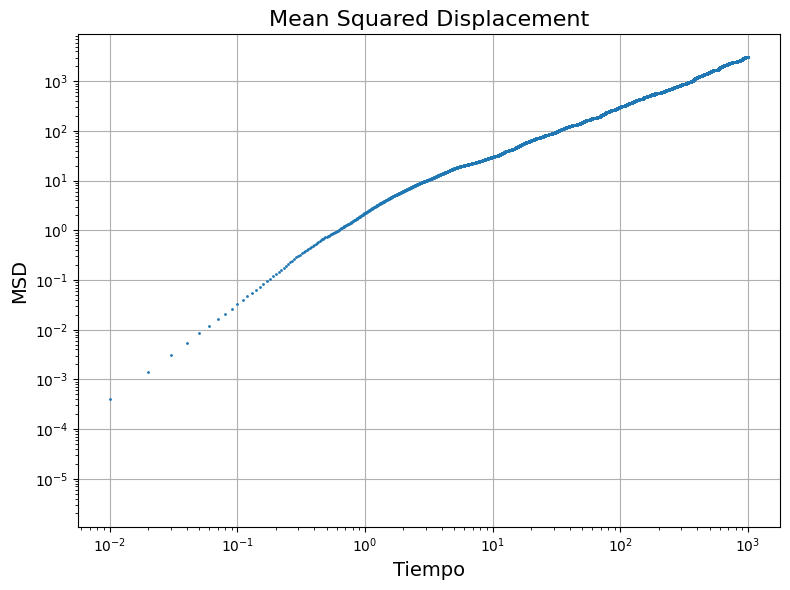

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data = np.loadtxt('msd.dat', comments='#')
steps = data[:, 0]
time = data[:, 1]
msd = data[:, 2]

# Graficar MSD vs tiempo
plt.figure(figsize=(8,6))
plt.plot(time, msd, 'o',markersize=1)
plt.xlabel('Tiempo', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('MSD', fontsize=14)
plt.title('Mean Squared Displacement', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


Ahora en unidades correctas: 


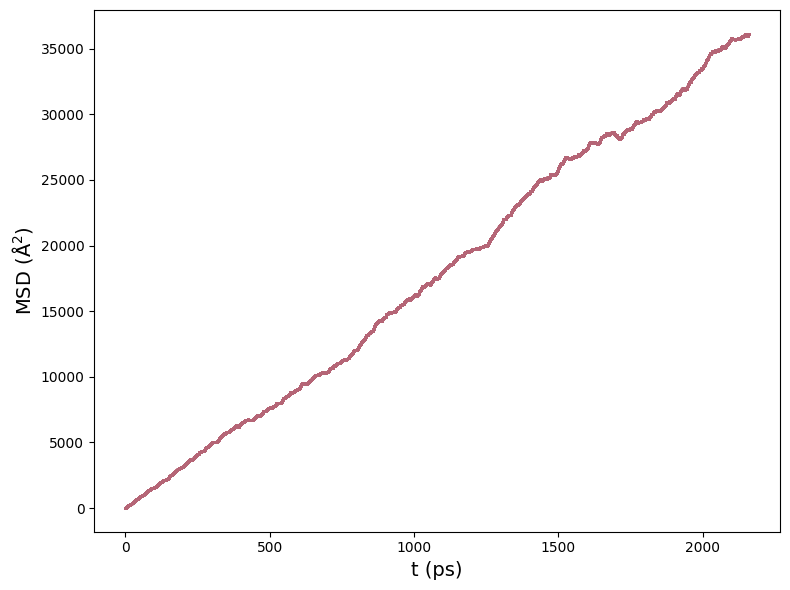

Coeficiente de difusión D = 2.9316 Å^2/ps
R^2 del ajuste = 0.9954


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Cargar los datos
data = np.loadtxt('msd.dat', comments='#')
time_LJ = data[:, 1]
msd_LJ = data[:, 2]

# Conversión a unidades reales
sigma = 3.4        # Å
tau = 2.16         # ps

time_ps = time_LJ * tau
msd_A2 = msd_LJ * sigma**2

# --- Gráfica MSD vs tiempo ---
plt.figure(figsize=(8,6))
plt.plot(time_ps, msd_A2, 'o', markersize=1,color='#b56576')
plt.xlabel('t (ps)', fontsize=14)
plt.ylabel('MSD (Å$^2$)', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()

# --- Ajuste lineal en el régimen difusivo ---
# Elegir ventana temporal (ajusta según tus datos)
mask = (time_ps > 500) & (time_ps < 2000)

slope, intercept, r_value, p_value, std_err = linregress(
    time_ps[mask], msd_A2[mask]
)

D = slope / 6.0   # Å^2 / ps

print(f"Coeficiente de difusión D = {D:.4f} Å^2/ps")
print(f"R^2 del ajuste = {r_value**2:.4f}")


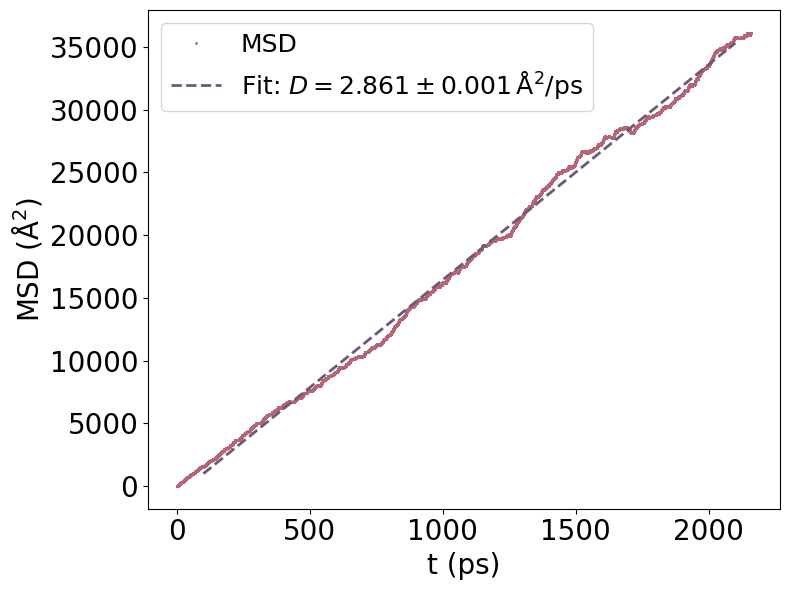

Coeficiente de difusión D = 2.8607 ± 0.0005 Å^2/ps
R^2 del ajuste = 0.9971


<Figure size 640x480 with 0 Axes>

In [110]:
# --- Ajuste lineal en el régimen difusivo ---
mask = (time_ps > 100) & (time_ps < 2100)

slope, intercept, r_value, p_value, std_err = linregress(
    time_ps[mask], msd_A2[mask]
)

D = slope / 6.0
D_err = std_err / 6.0

# --- Gráfica ---
plt.figure(figsize=(8,6))

plt.plot(time_ps, msd_A2, 'o', markersize=1, color='#b56576', label='MSD')

# Etiqueta con resultado del fit
label_fit = rf'Fit: $D = {D:.3f} \pm {D_err:.3f}\,\mathrm{{\AA^2/ps}}$'

plt.plot(
    time_ps[mask],
    slope * time_ps[mask] + intercept,
    '--',
     color="#6d597a",
    linewidth=2,
    label=label_fit
)

plt.xlabel('t (ps)', fontsize=20)
plt.ylabel('MSD (Å$^2$)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

print(f"Coeficiente de difusión D = {D:.4f} ± {D_err:.4f} Å^2/ps")
print(f"R^2 del ajuste = {r_value**2:.4f}")

plt.savefig("figures/msd_fit.png",dpi=300)
